# OOP LEKCE 1


### Užitečné odkazy

#### *Zákaldy OOP*
* https://github.com/jakub85/PythonOOP

#### *Pokročilé OOP*
* https://naucse.python.cz/course/mi-pyt/intro/magic/

#### *Dekorátory*
* https://realpython.com/primer-on-python-decorators/


## KAPITOLA 1: SCOPE

![](https://pythonsimplified.com/ezoimgfmt/mlc28azwhs4j.i.optimole.com/LCn8L6U-EM6U4rmg/w:1024/h:648/q:eco/https://pythonsimplified.com/wp-content/uploads/2021/11/Types-of-scope-in-Python.jpg?ezimgfmt=rs:700x443/rscb3/ng:webp/ngcb3)

In [34]:
# L
a = "global"
def funkce():
    a = "local"
    print(a)

funkce()
print(a)

local
global


In [90]:
# G
a = "global"
def funkce():
    def vnitrni_funkce():
        print(a)
    vnitrni_funkce()

funkce()
print(a)

global
global


In [93]:
# E
a = "global"
def funkce():
    a = "enclosing"
    def vnitrni_funkce():
        print(a)
    vnitrni_funkce()
    
funkce()
print(a)

enclosing
global


In [87]:
# B
def funkce():
    print(None)

funkce()

None


### Chyták 1 - změna scope

In [98]:
a = "global"
def funkce():
    global a
    a = "local"
funkce()
a

'local'

### Chyták 2 - Mutable defaults

In [39]:
def pridej_prvek(prvek,sez = []):
    sez.append(prvek)
    return sez

In [40]:
prvni_seznam = pridej_prvek(10)
prvni_seznam

[10]

In [41]:
druhy_seznam = pridej_prvek(20)
druhy_seznam

[10, 20]

In [42]:
def pridej_prvek(prvek,sez = None):
    if sez is None:
        sez = []
    sez.append(prvek)
    return sez

In [43]:
treti_seznam = pridej_prvek(10)
treti_seznam

[10]

### Non-local
* https://www.python.org/dev/peps/pep-3104/

In [115]:
# Bez použití non local
name = "Pi"

def vnejsi_funkce():
    name = "Python"
    def vnitrni_funkce():
        name = "Pyladies"
        print("vnitrni:",name)
        
    vnitrni_funkce()
    print("vnejsi:",name)

vnejsi_funkce()
print("global:",name)

vnitrni: Pyladies
vnejsi: Python
global: Pi


In [126]:
# S použitím non local

name = "Pi"
def vnejsi_funkce():
    name = "Python"
    def vnitrni_funkce():
        nonlocal name
        name = "Pyladies"
        print("vnitrni:",name)
        
    vnitrni_funkce()
    print("vnejsi:",name)

vnejsi_funkce()
print("global:",name)

vnitrni: Pyladies
vnejsi: Pyladies
global: Pi


# KAPITOLA 2: DEKORÁTORY

![](https://i.kym-cdn.com/photos/images/newsfeed/000/950/450/c54.jpg)

## 2.1: Princip dekorátoru

### Funkce obsahujcí jiné funkce


In [44]:
def hello_world():
    print("byla spuštěna funkce hello_world()!")
    
    def hello_pyladies():
        print("vnitrni fce hello_pyladies() spustena....")
    
    def hello_python():
        print("vnitrni fce hello_python() spustena....")
    
    hello_pyladies()
    hello_python()
    
hello_world()
    

byla spuštěna funkce hello_world()!
vnitrni fce hello_pyladies() spustena....
vnitrni fce hello_python() spustena....


### Funkce vracející funkci 

In [45]:
def hello_world(name):
    print("byla spuštěna funkce hello_world()!")
    
    def hello_pyladies():
        print("vnitrni fce hello_pyladies() spustena....")
        return "Hello pyladies!"
    
    def hello_python():
        print("vnitrni fce hello_python() spustena....")
        return "Hello python!"
        
    if name == "Pyladies":
        return hello_pyladies
    else:
        return hello_python
    

In [46]:
x = hello_world("Pyladies")

byla spuštěna funkce hello_world()!


In [47]:
x

<function __main__.hello_world.<locals>.hello_pyladies()>

In [48]:
x()

vnitrni fce hello_pyladies() spustena....


'Hello pyladies!'

### Funkce jako argument

In [49]:
def hello_world():
    return "byla spuštěna funkce hello_world()!"
    
def rozsirujici_funkce(func):
    print("byla spuštěna funkce  rozsirujici_funkce()")
    func()

In [50]:
# CHYBA !!!
rozsirujici_funkce(hello_world())

byla spuštěna funkce  rozsirujici_funkce()


TypeError: 'str' object is not callable

In [53]:
# ŘEŠENÍ
rozsirujici_funkce(hello_world)

byla spuštěna funkce  rozsirujici_funkce()


## 2.2: Vlastní dekorátor

In [52]:
def dekorator(func):
    
    def obal():
        print("Dekorace před spuštěním")
        
        func()
        
        print("Dekorace po spuštění")
        
    return obal

def funkce_k_dekorovani():
    print("Nedekorovany prosty text")
      
funkce_k_dekorovani = dekorator(funkce_k_dekorovani)
funkce_k_dekorovani()

Dekorace před spuštěním
Nedekorovany prosty text
Dekorace po spuštění


In [20]:
@dekorator
def funkce_k_dekorovani():
    print("Nedekorovany prosty text")
    
funkce_k_dekorovani()

Dekorace před spuštěním
Nedekorovany prosty text
Dekorace po spuštění


In [8]:
#@dekorator
def funkce_k_dekorovani():
    print("Nedekorovany prosty text")
    
funkce_k_dekorovani()

Nedekorovany prosty text


#### Dekorovaná funkce s parametrem

In [1]:
# CHYBA !!!!
def dekorator(func):
    
    def obal():
        print("Dekorace před spuštěním")
        
        func()
        
        print("Dekorace po spuštění")
        
    return obal

def funkce_k_dekorovani(name):
    print(f"Hello:{name}")

In [2]:
@dekorator
def funkce_k_dekorovani(name):
    print(f"Hello:{name}")
    
funkce__k_dekorovani()

Dekorace před spuštěním


TypeError: funkce_k_dekorovani() missing 1 required positional argument: 'name'

In [197]:
# ŘEŠENÍ
def dekorator(func):
    
    def obal(*args,**kwargs):
        print("Dekorace před spuštěním")
        
        func(*args,**kwargs)
        
        print("Dekorace po spuštění")
        
    return obal

def funkce_k_dekorovani(name):
    print(f"Hello:{name}")

In [198]:
@dekorator
def funkce_k_dekorovani(name):
    print(f"Hello:{name}")
    
funkce_k_dekorovani("Pyladies")

Dekorace před spuštěním
Hello:Pyladies
Dekorace po spuštění


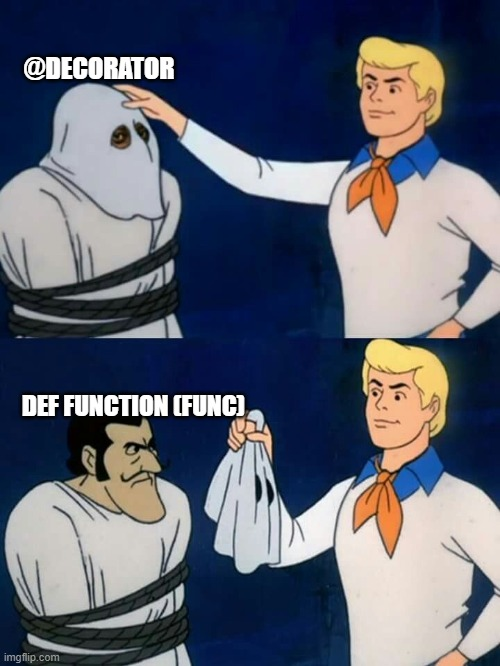

### Úkol: Vymyslete a napiště vlastní dekorátor

## 2.2: Typy dekorátorů

### Dekorátor který nemění funkci (Register)
* Například registrace funkcí

#### Bez použití dekorátor

In [199]:
operators = {}
def register_operator(func):
    operators[func.__name__] = func

def add(a, b):
    return a + b

register_operator(add)

#### S použitím dekorátoru

In [200]:
operators = {}

def register_operator(func):
    operators[func.__name__] = func
    return func

@register_operator
def add(a, b):
    return a + b

In [201]:
operators

{'add': <function __main__.add(a, b)>}

In [202]:
a = 10
b = 20
operator_name = "add"

func = operators[operator_name]
func(a, b)

30

### Dekorátor upravující funkci (Basic decorator)
* Rozšíření funkcionalit

In [215]:
def to_floats(func):
    
    def vnitrni_funkce(a, b):
        a = float(a)
        b = float(b)
        return func(a, b)
    
    return vnitrni_funkce

@to_floats
def add(a, b):
    """Adds two numbers"""
    return a + b

In [216]:
add(1, '2')

3.0

### Úkol: Jak by vypadalo použití to_floats bez dekorátoru ?

### Dekorátor s parametrem

In [205]:
def opakovani(pocet):
    
    def decorator_opakovani(func):
        
        def wrapper_opakovani(*args, **kwargs):
            
            for _ in range(pocet):
                value = func(*args, **kwargs)
            return value
        
        return wrapper_opakovani
    
    return decorator_opakovani

In [206]:
@opakovani(pocet=4)
def hello(name):
    print(f"Hello {name}")

hello("Pyladies")

Hello Pyladies
Hello Pyladies
Hello Pyladies
Hello Pyladies


### Dekorátor třídy

In [217]:
class Values:
    def __init__(self, name, price, quantity):
        self.name = name
        self.price = price
        self.quantity = quantity
        
    def total_cost(self):
        return self.price * self.quantity

In [218]:
v = Values(10,100,1)
v.total_cost()

100

In [219]:
v

In [220]:
from dataclasses import dataclass

@dataclass
class Values:
    name: str
    price: float
    quantity: int
        
    def total_cost(self):
        return self.price * self.quantity
        

In [221]:
v = Values(10,100,1)
v.total_cost()

100

In [228]:
v

Values(name=10, price=100, quantity=1)

### Doplnění

#### Skládání dekorátorů

In [238]:
def dekorator(func):
    def obal():
        print("Dekorace před spuštěním")
        func()
        print("Dekorace po spuštění")
        
    return obal

def dvakrat(func):
    def obal():
        func()
        func()
        
    return obal
    
@dekorator
@dvakrat
def funkce_k_dekorovani():
    print(f"Hello Pyladies")

In [252]:
funkce_k_dekorovani()

Dekorace před spuštěním
Hello Pyladies
Dekorace po spuštění


### Identita dekorovaných funkcí

In [253]:
def funkce_k_dekorovani():
    print(f"Hello Pyladies")
    
funkce_k_dekorovani.__name__

'funkce_k_dekorovani'

In [255]:
def dekorator(func):
    def obal():
        print("Dekorace před spuštěním")
        func()
        print("Dekorace po spuštění")
        
    return obal

    
@dekorator
def funkce_k_dekorovani():
    print(f"Hello Pyladies")
    
funkce_k_dekorovani.__name__

'obal'

In [260]:
import functools

def dekorator(func):
    @functools.wraps(func)
    def obal():
        print("Dekorace před spuštěním")
        func()
        print("Dekorace po spuštění")
        
    return obal

    
@dekorator
def funkce_k_dekorovani():
    print(f"Hello Pyladies")
    
funkce_k_dekorovani.__name__

'funkce_k_dekorovani'